In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import os
from scipy.interpolate import UnivariateSpline

overleaf_path = '/Users/daniel/Dropbox (Sydney Uni)/Apps/Overleaf/alpha Dra/figs/'

def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

plt.style.use('science')

In [3]:
# time, flux = np.loadtxt('data/photometry/tess_corrected.txt', usecols=(0,1)).T
# plt.plot(time, flux, '.k')
# m = time < 1800
# time = time[m]
# flux = flux[m]
# plt.xlim(time[0], time[-1])
# plt.xlabel('Time [BJD]')
# plt.ylabel('Flux')

# # plt.savefig('test.png', dpi=300, bbox_inches='tight', transparent=True)

In [4]:
# from matplotlib import rcParams

# rcParams["font.size"] = 12
# rcParams["xtick.labelsize"] = 12
# rcParams["ytick.labelsize"] = 12

# rcParams["axes.titlesize"] = 12

# rcParams["axes.labelsize"] = 12



In [5]:
# fig = plt.figure(figsize=[10,7])

# ax = plt.subplot(211)

# ax.plot(time, flux, '.k')
# m = time < 1800
# time = time[m]
# flux = flux[m]
# ax.set_xlim(time[0], time[-1])
# ax.set_xlabel('Time [BJD]')
# ax.set_ylabel('Flux')


# ax = plt.subplot(223)
# ax.plot(time, flux, '.k')
# ax.set_xlim(1695.65, 1696.4)
# ax.set_ylabel('Flux')
# ax.set_xlabel('Time [BJD]')

# ax = plt.subplot(224)
# ax.plot(time, flux, '.k')
# ax.set_xlim(1734.1, 1735)
# ax.set_yticks([])
# ax.set_xlabel('Time [BJD]')
# plt.subplots_adjust(hspace=0.3, wspace=0.1)

# plt.savefig('adra.png', dpi=300, transparent=True)

In [6]:
# import lightkurve as lk

# lc = lk.LightCurve(time, flux)
# ax = lc.flatten().to_periodogram().plot()
# ax.set_xlim(1, 350)
# ax.set_ylim(0, 0.00001)
# ax.set_ylabel('Amplitude')
# plt.savefig('test.png', dpi=300, bbox_inches='tight', transparent=True)

In [7]:
tpfs = lk.search_targetpixelfile('alpha Draconis', mission='TESS').download_all()

In [8]:
lc_files = lk.search_lightcurvefile('alpha Draconis', mission='TESS').download_all()#.SAP_FLUX

/Users/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  """Entry point for launching an IPython kernel.


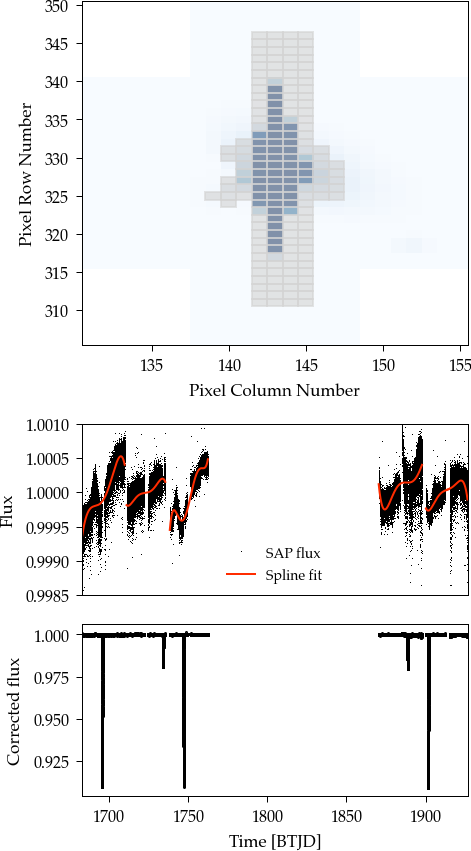

In [21]:
fig, axes = plt.subplots(3,1, figsize=[3.36,6], gridspec_kw={'height_ratios':[1,0.5,0.5]}, constrained_layout=True)

ax = axes[0]
tpfs[0].plot(ax=ax, aperture_mask=tpfs[0].pipeline_mask, style='science', aspect='auto', mask_color='lightgrey', cmap='Blues', show_colorbar=False)
ax.set(title='')

ax = axes[1]
times, fluxes = [], []
for lc in lc_files:
    lc = lc.remove_nans()
    time, flux = lc.time.value, lc.sap_flux.value
    flux /= np.median(flux)
    t0_guess = time[np.argmin(flux)]
    spacing = 0.4
    mask = (time > t0_guess-spacing) & (time < t0_guess+spacing)
    
    spl = UnivariateSpline(time[~mask], flux[~mask], k=5, s=0.1)
    xs = np.linspace(time[0], time[-1], 1000)

    ax.plot(time[~mask], flux[~mask], ',k', rasterized=True)
    ax.plot(xs, spl(xs), c='C3', rasterized=True)
    times.extend(time)
    fluxes.extend(flux / spl(time))

ax.plot(time[~mask], flux[~mask], ',k', label='SAP flux', rasterized=True)
ax.plot(xs, spl(xs), c='C3', label='Spline fit', rasterized=True)
ax.legend(fontsize=7)

ax.set(xlim=[lc_files[0].time.value[0], lc_files[-1].time.value[-1]],
      ylim=[0.9985, 1.001],
      xticks=[],
      ylabel='Flux')

ax = axes[2]
ax.plot(times, fluxes, '.k', markersize=1, rasterized=True)
ax.set(xlim=[times[0], times[-1]],
      ylabel='Corrected flux',
      xlabel='Time [BTJD]')

# plt.subplots_adjust(hspace=0.1)

plt.savefig(overleaf_path+'lc_corr.pdf', dpi=300, bbox_inches='tight')

In [18]:
tpfs[0].sector

14

In [ ]:
tpfs[0].plot

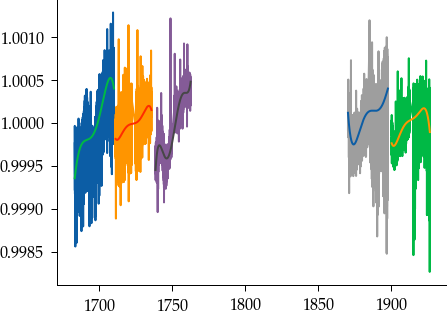

In [22]:
from scipy.interpolate import UnivariateSpline

for lc in lc_files:
    lc = lc.remove_nans()
    time, flux = lc.time.value, lc.sap_flux.value
    flux /= np.median(flux)
    t0_guess = time[np.argmin(flux)]
    spacing = 0.4
    mask = (time > t0_guess-spacing) & (time < t0_guess+spacing)
    
    spl = UnivariateSpline(time[~mask], flux[~mask], k=5, s=0.1)
    xs = np.linspace(time[0], time[-1], 1000)

    plt.plot(time[~mask], flux[~mask])
    plt.plot(xs, spl(xs))

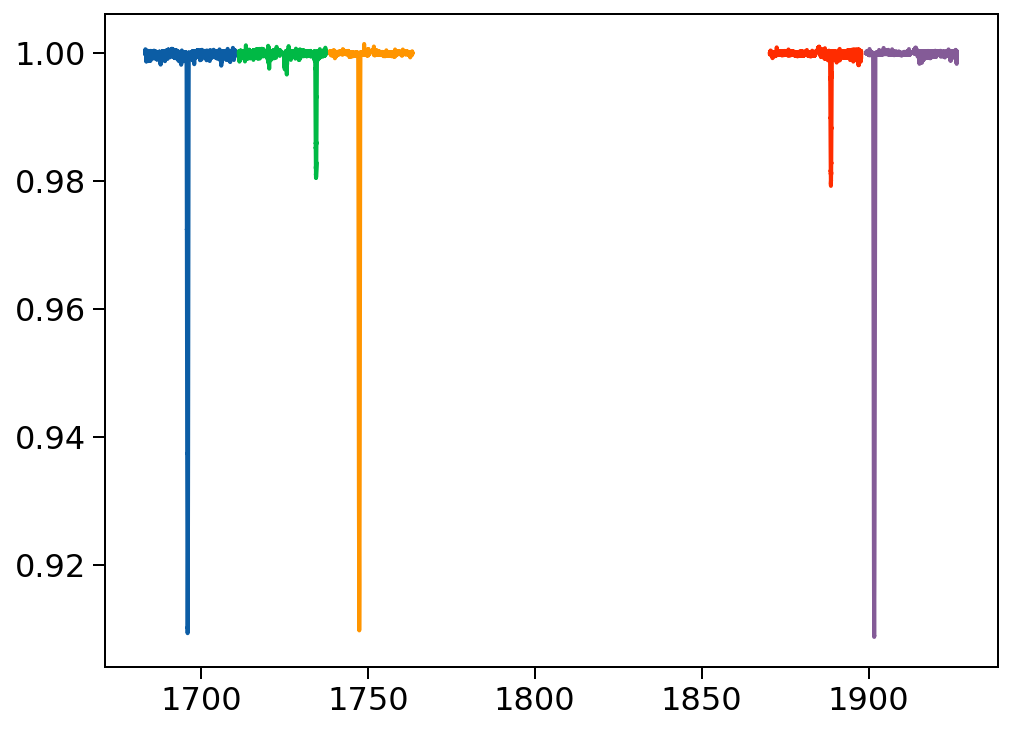

In [5]:
from scipy.interpolate import UnivariateSpline

times = []
fluxes = []
fluxes_err = []
for lc in lc_files:
    lc = lc.normalize().remove_nans()
    time, flux = lc.time, lc.flux
    t0_guess = time[np.argmin(flux)]
    spacing = 0.4
    mask = (time > t0_guess-spacing) & (time < t0_guess+spacing)
    
    spl = UnivariateSpline(time[~mask], flux[~mask], k=5, s=0.1)
    xs = np.linspace(time[0], time[-1], 1000)

    plt.plot(time, flux / spl(time))
    
    times.extend(time)
    fluxes.extend(flux / spl(time))
    fluxes_err.extend(lc.flux_err)

In [6]:
np.savetxt('data/photometry/tess_corrected.txt', list(zip(times, fluxes, fluxes_err)))

(0.9097461655299717, 0.9093114780922418)

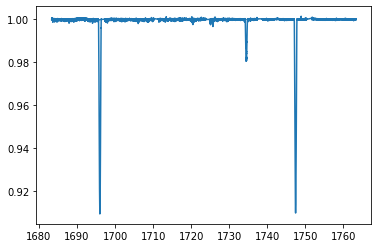

In [38]:
t, y, yerr = np.array(times), np.array(fluxes), np.array(fluxes_err)
plt.plot(t,y)

y[t > 1730][np.argmin(y[t > 1730])], y[t < 1730][np.argmin(y[t < 1730])]

In [46]:
t, y, yerr = np.loadtxt('data/photometry/adra_sap_spline_corrected.txt',usecols=(0,1,2)).T

Text(0, 0.5, 'Flux')

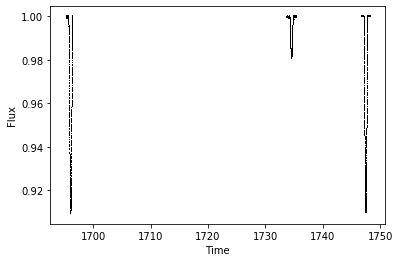

In [47]:
t0_guess = t[np.argmin(y)]

spacing = 0.8

y_transit = y[(t > t0_guess-spacing) & (t < t0_guess+spacing)]
t_transit = t[(t > t0_guess-spacing) & (t < t0_guess+spacing)]
yerr_transit = yerr[(t > t0_guess-spacing) & (t < t0_guess+spacing)]

t1_guess = t[t>1700][np.argmin(y[t>1700])]
y_transit2 = y[(t > t1_guess-spacing) & (t < t1_guess+spacing)]
t_transit2 = t[(t > t1_guess-spacing) & (t < t1_guess+spacing)]
yerr_transit2 = yerr[(t > t1_guess-spacing) & (t < t1_guess+spacing)]

t2_guess = t[(t>1700) & (t<1740)][np.argmin(y[(t>1700) & (t<1740)])]
y_transit3 = y[(t > t2_guess-spacing) & (t < t2_guess+spacing)]
t_transit3 = t[(t > t2_guess-spacing) & (t < t2_guess+spacing)]
yerr_transit3 = yerr[(t > t2_guess-spacing) & (t < t2_guess+spacing)]

y_transit /= np.max(y_transit)
y_transit2 /= np.max(y_transit2)
y_transit3 /= np.max(y_transit3)

plt.plot(t_transit, y_transit, ',k')
plt.plot(t_transit2, y_transit2, ',k')
plt.plot(t_transit3, y_transit3, ',k')


plt.xlabel('Time')
plt.ylabel('Flux')

In [48]:
full_transit_time, full_transit_flux, full_transit_err = np.hstack([t_transit, t_transit2, t_transit3]), np.hstack([y_transit, y_transit2, y_transit3]), np.hstack([yerr_transit, yerr_transit2, yerr_transit3])

sort = np.argsort(full_transit_time)
full_transit_time = full_transit_time[sort][::20]
full_transit_flux = full_transit_flux[sort][::20]
full_transit_err = full_transit_err[sort][::20]


In [60]:
def q_to_u(q1, q2):
    return 2*np.sqrt(q1)*q2, np.sqrt(q1)*(1 - 2*q2)

def model(params, x):
    period, rsum, rratio, incl, sbratio, t0, f_c, f_s, mean = params #q11, q12, q21, q22, mean = params
    
    r1, r2 = rsum/(1.+rratio), rsum*rratio/(1.+rratio)
#     u11, u12 = q_to_u(q11,q12)
#     u21, u22 = q_to_u(q21,q22)
    lc = ellc.lc(x,t_zero=t0, #q=q,
            radius_1=r1, radius_2=r2,
             incl=incl,
             sbratio=sbratio, shape_1='roche', shape_2='roche', #ld_1='quad', ld_2='quad', ldc_1=[u11, u12], ldc_2=[u21, u22],
             period=period, f_c=f_c, f_s=f_s)
    return lc + mean# / np.max(lc)

def lnprior(params):
    period, rsum, rratio, incl, sbratio, t0, f_c, f_s, mean = params
    r1, r2 = rsum/(1.+rratio), rsum*rratio/(1.+rratio)
    # Check LD1:
#     if (0 < q11 < 1) & (0 < q12 < 1) & (0 < q21 < 1) & (0 < q22 < 1) & (70 < incl < 90) & (sbratio < 1.5) & ((t0_guess-1) < t0 < (t0_guess+1)):
#         return 0.
    if (70 < incl < 90) & (sbratio < 1.5) & ((t0_guess-1) < t0 < (t0_guess+1)):
        return 0.
    else:
        return -np.inf
    
def lnlike(params, x, y, yerr):
    lp = lnprior(params)
    if not np.isfinite(lp):
        return -np.inf
    try:
        model_flux = model(params, x)
        return -0.5*np.sum((y-model_flux)**2/yerr**2)
    except:
        return -np.inf
    
from scipy.optimize import minimize
nll = lambda *args: -lnlike(*args)

(1733.4655006398082, 1735.4655006398082)

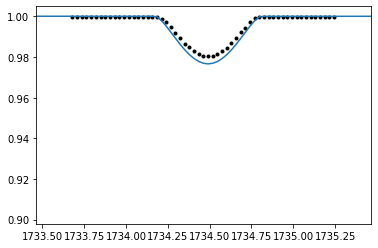

In [61]:
f_c, f_s = 0.6071025773236461, 0.24107770657401392, 

params = np.array([
    5.14192040e+01, # Period
    7.17949071e-02, # Rsum
    6.28722905e-01, # Rratio
    8.62150418e+01, # Incl
    6.91829286e-01, # Sbratio
    1.69601971e+03, # t0
    6.20730605e-01, # fc
    1.60481296e-01, # fs
#     2.68060970e-01, # q11
#     4.55712020e-01, # q12
#     8.30538026e-01, # q21
#     5.82431661e-02, # q22
    0.              # Mean
])
lc = model(params, full_transit_time)

plt.plot(full_transit_time,full_transit_flux, '.k')
plt.plot(full_transit_time, lc)
plt.xlim(t2_guess-1, t2_guess+1)

In [62]:
bounds = [
    (50,52),
    (0.01, 0.1),
    (0.1, 0.9),
    (80, 90),
    (0.1, 0.99),
    (t0_guess-1, t0_guess+1),
    (f_c-0.1, f_c+0.1),
    (f_s-0.1, f_s+0.1),
#     (0,1),
#     (0,1),
#     (0,1),
#     (0,1),
    (-0.5,0.5)
]

In [ ]:
from scipy.optimize import differential_evolution

soln = differential_evolution(nll, bounds, args=(full_transit_time, full_transit_flux, full_transit_err))

In [26]:
soln.x

array([ 5.14192501e+01,  7.14428315e-02,  5.25455970e-01,  8.62472998e+01,
        9.11776362e-01,  1.69601965e+03,  6.11548046e-01,  2.13898405e-01,
        2.91749587e-01,  2.20899586e-01,  1.35272142e-01,  5.23279654e-02,
       -3.22077603e-04])

In [27]:
import emcee

pos = soln.x + 1e-4*np.random.randn(32, len(soln.x))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(full_transit_time, full_transit_flux, full_transit_err))
sampler.run_mcmc(pos, 10000, progress=True);

/Users/danielhey/anaconda3/envs/phoebe/lib/python3.7/site-packages/emcee/ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
100%|██████████| 10000/10000 [22:06<00:00,  7.54it/s]


In [28]:
discard = 5000
flat_samples = sampler.get_chain(discard=discard,)
#                                  flat=True)

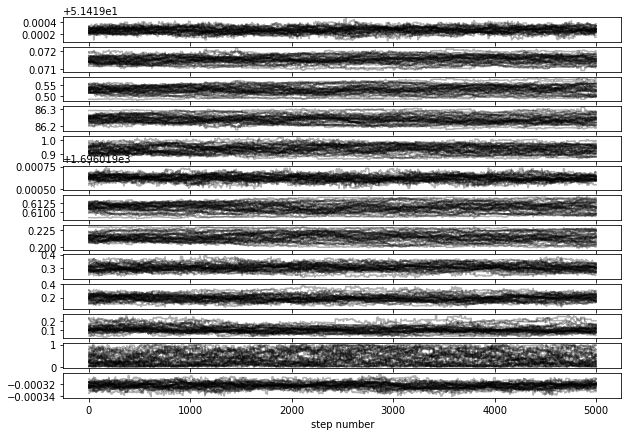

In [29]:
fig, axes = plt.subplots(len(flat_samples.T), figsize=(10, 7), sharex=True)
# samples = sampler.get_chain()
for i in range(ndim):
    ax = axes[i]
    ax.plot(flat_samples[:, :, i], "k", alpha=0.3)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

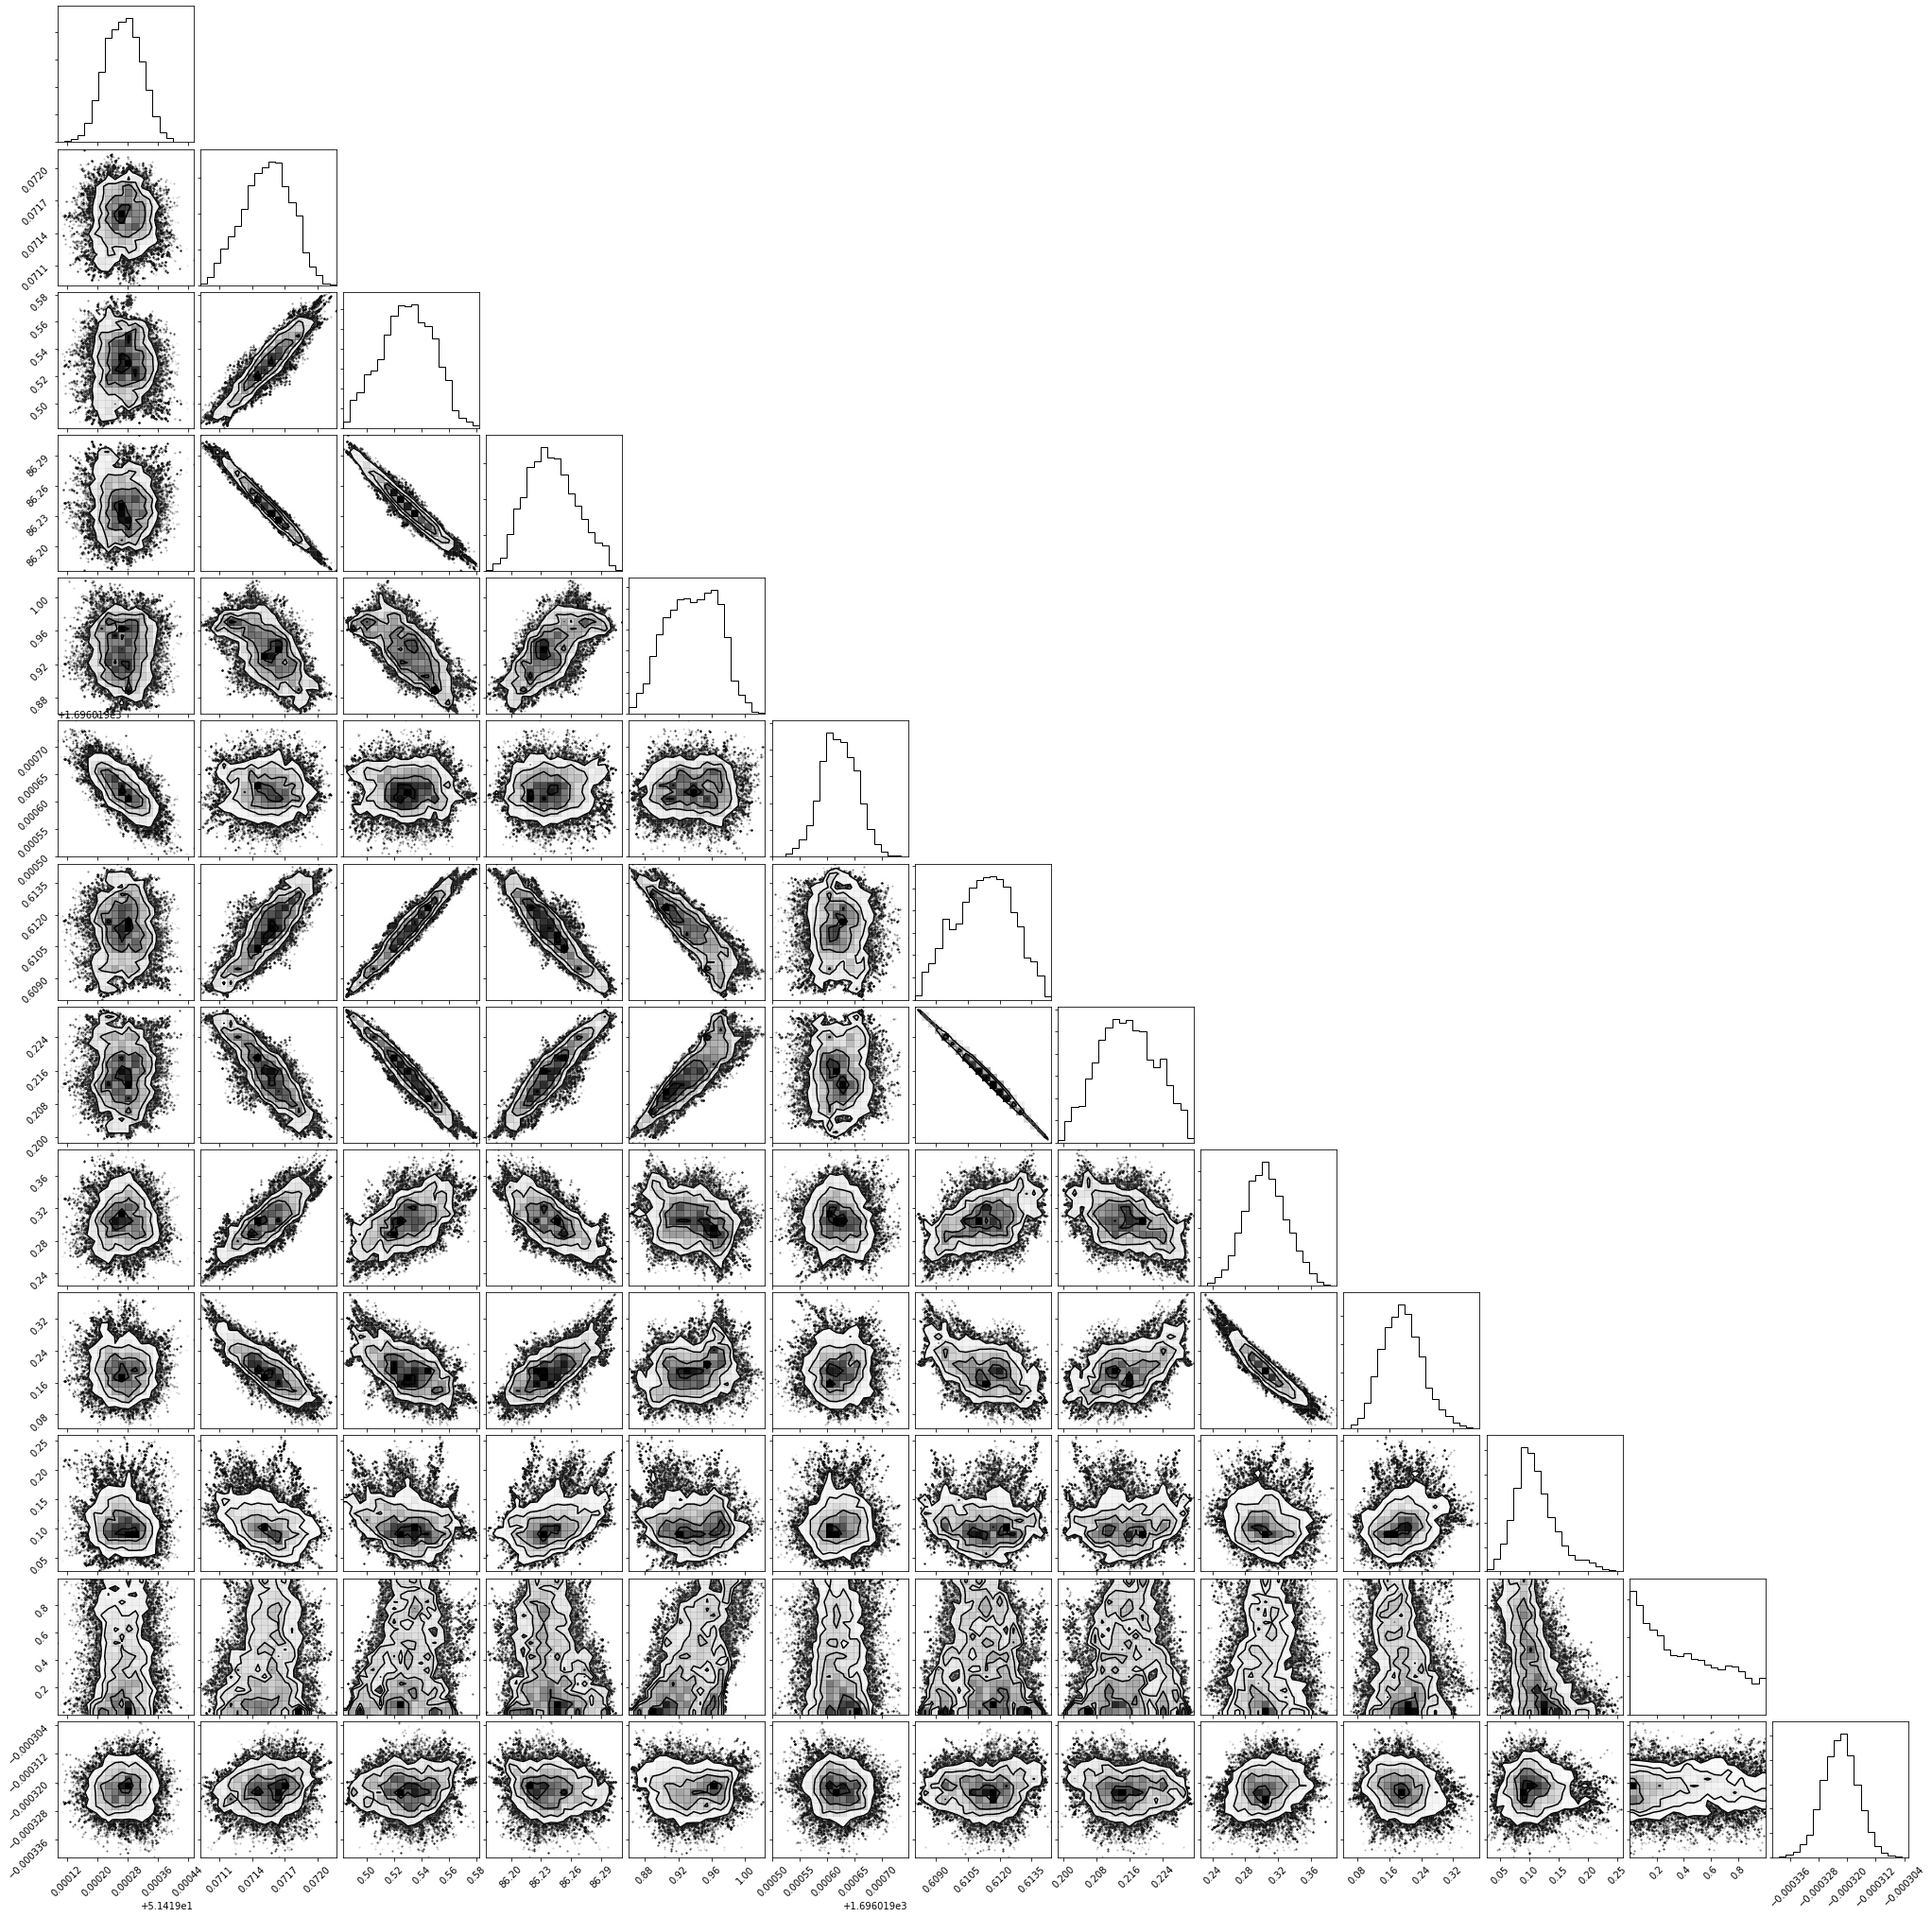

In [35]:
import corner

flat_samples = sampler.get_chain(discard=discard,flat=True)


corner.corner(flat_samples);

In [36]:
full_trace = flat_samples
params = ['period', 'rsum', 'rratio', 'incl', 'sbratio', 't0', 'f_c', 'f_s', 'q11', 'q12', 'q21', 'q22', 'mean']
for param, i in zip(params, full_trace.T):
    mean = np.mean(i, axis=0)
    sd = np.std(i, axis=0)
    print(f'{param}, {mean:.5f}, {sd:.5f}')

period, 51.41927, 0.00005
rsum, 0.07153, 0.00022
rratio, 0.52906, 0.01887
incl, 86.24025, 0.02469
sbratio, 0.93674, 0.03034
t0, 1696.01962, 0.00003
f_c, 0.61124, 0.00134
f_s, 0.21535, 0.00680
q11, 0.30506, 0.02540
q12, 0.19250, 0.04992
q21, 0.11000, 0.03526
q22, 0.39723, 0.28718
mean, -0.00032, 0.00000


In [37]:
rsum, rratio = 0.07153, 0.52906

rsum/(1.+rratio), rsum*rratio/(1.+rratio)

(0.04678037487083568, 0.024749625129164322)